📊 Desafio 60 — Análise de Indicadores de Saúde Pública
📂 Dataset: dia_60_saude_publica.csv
Este conjunto de dados apresenta indicadores de saúde de diferentes cidades brasileiras, incluindo taxa de vacinação, número de casos de doenças, gastos com saúde e IDH.

🔍 Tarefas:
Tratamento de Dados
- Verifique se existem valores nulos no dataset. Se houver, aplique um tratamento adequado (remoção ou imputação, justificando sua escolha).

Análise Exploratória
- Quais cidades apresentam os maiores e menores índices de vacinação?

Visualização
- Crie um gráfico de dispersão relacionando o IDH da cidade com o número de casos de doenças registradas.

Machine Learning
- Modele um classificador simples para prever se uma cidade é de "Alto Risco" ou "Baixo Risco" com base nas variáveis disponíveis.
Sugestões:

- Use RandomForestClassifier ou LogisticRegression.

- Divida os dados com train_test_split.

- Avalie com accuracy_score e classification_report.

- Verifique a importância das variáveis para a classificação.



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("dia_60_saude_publica.csv")
df.head()

,Cidade,Taxa_Vacinacao,Casos_Doencas,Gastos_Saude_per_capita,IDH,Nivel_Risco
0,Cidade_1,72.03,125,785.76,0.747,Alto Risco
1,Cidade_2,67.48,109,636.80,0.585,Alto Risco
2,Cidade_3,72.93,110,1494.07,0.751,Alto Risco
3,Cidade_4,86.63,116,2373.93,0.749,Baixo Risco
4,Cidade_5,82.68,110,1637.80,0.898,Baixo Risco


In [10]:
#Verifique se existem valores nulos no dataset. Se houver, aplique um tratamento adequado (remoção ou imputação, justificando sua escolha).
print(df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)

Cidade                     0
Taxa_Vacinacao             0
Casos_Doencas              0
Gastos_Saude_per_capita    0
IDH                        0
Nivel_Risco                0
dtype: int64


In [22]:
#Quais cidades apresentam os maiores e menores índices de vacinação?
cidade_maior = df.loc[df["Taxa_Vacinacao"].idxmax()]
cidade_menor = df.loc[df["Taxa_Vacinacao"].idxmin()]
print(cidade_maior[["Cidade", "Taxa_Vacinacao"]])
print(cidade_menor[["Cidade", "Taxa_Vacinacao"]])

Cidade            Cidade_14
Taxa_Vacinacao         99.7
Name: 13, dtype: object
Cidade            Cidade_75
Taxa_Vacinacao        60.14
Name: 74, dtype: object


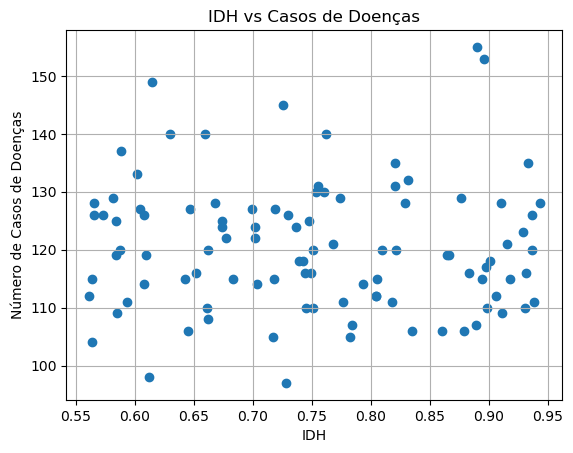

In [36]:
#Crie um gráfico de dispersão relacionando o IDH da cidade com o número de casos de doenças registradas.
plt.scatter(df["IDH"], df["Casos_Doencas"])
plt.title("IDH vs Casos de Doenças")
plt.xlabel("IDH")
plt.ylabel("Número de Casos de Doenças")
plt.grid()
plt.show()

In [54]:
#Modele um classificador simples para prever se uma cidade é de "Alto Risco" ou "Baixo Risco" com base nas variáveis disponíveis.
le = LabelEncoder()
df["Nivel_Risco"] = le.fit_transform(df["Nivel_Risco"])

X = df.drop(["Cidade", "Nivel_Risco"], axis=1)
y = df["Nivel_Risco"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

importances = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Taxa_Vacinacao             0.793320
Casos_Doencas              0.116791
IDH                        0.049839
Gastos_Saude_per_capita    0.040051
dtype: float64
